# Análisis cualitativo del modelo

Los puntos de equilibrio son 

$P_1 = (0,0,0)$; 

$P_2 = (\sqrt{\beta (\rho - 1)},\sqrt{\beta (\rho - 1)},\rho-1)$ ; 

$P_3 = (-\sqrt{\beta (\rho - 1)},-\sqrt{\beta (\rho - 1)},\rho-1)$

La matriz Jacobiana asociada a las ecuaciones diferenciales es:


$J(x,y,z) = \begin{pmatrix}
-\sigma & \sigma & 0 \\
\rho - z & -1 & -x \\
y & x & -\beta
\end{pmatrix}$

Para el punto $P_1 = (0,0,0)$ la matriz es: 

$J(P_1) = \begin{pmatrix}
-\sigma & \sigma & 0 \\
\rho & -1 & 0 \\
0 & 0 & -\beta
\end{pmatrix}$


Cuyos eigen valores son: 

$\lambda_1 = \frac{1}{2}(\sqrt{1 - 2\sigma + 4 \rho\sigma + \sigma^2} - 1 - \sigma)$ 

$\lambda_2 = -\frac{1}{2}(\sqrt{1 - 2\sigma + 4 \rho\sigma + \sigma^2}+1+\sigma)$

$\lambda_3 = -\beta$


Para colocar estos valores en el plano imaginario de tal forma que tengamos órbitas periodicas estables necesitamos dos condiciones:

$1+\sigma=0$ y $1 - 2\sigma + 4 \rho\sigma + \sigma^2<0$

De la primera condición obtenemos $\sigma = - 1$ pero queremos que todos los valores sean positivos, por lo tanto este punto no es estable. En este caso no importa si $\rho >1$, $\rho <1$ o $\rho =1$, tendremos soluciones no estables.

Para el punto 

$P_2 = (\sqrt{\beta (\rho - 1)},\sqrt{\beta (\rho - 1)},\rho-1)$

necesitamos que todos sus compoentes sean reales, por lo que queremos que $\beta (\rho - 1)\geq1$; lo que se cumple si $ (\rho - 1)\geq1$, el caso $\rho = 1$ hace que el punto $P_2$ sea $P_2 = (0,0,0)$ que es el caso anterior que se demostró no estable, por lo que la unica opción para este punto es que $\rho >1$.

La matriz Jacobiana asociada a este punto es 

$J(P_2) = \begin{pmatrix}
-\sigma & \sigma & 0 \\
1 & -1 & -\sqrt{\beta (\rho - 1)} \\
\sqrt{\beta (\rho - 1)} & \sqrt{\beta (\rho - 1)} & -\beta
\end{pmatrix}$

Los valores propios de esta matriz son:
    
$\lambda_1 = i\ \sqrt{\beta(\rho+\sigma)}$ 

$\lambda_2 = -i\ \sqrt{\beta(\rho+\sigma)}$

$\lambda_3 = -(1+\beta+\sigma)$


Como $\lambda_1$ y $\lambda_2$ son totalmente imaginarios tenemos que el punto $P_2$ es estable al elegir soluciones del tipo $x_i(t) = e^{\lambda_it}$.

Para el punto $P_3$ tenemos las mismas condiciones que para el punto $P_2$, es decir necesitamos que $\rho >1$

La matriz Jacobiana asociada a $P_3$ es:

$J(P_3) = \begin{pmatrix}
-\sigma & \sigma & 0 \\
1 & -1 & \sqrt{\beta (\rho - 1)} \\
-\sqrt{\beta (\rho - 1)} & -\sqrt{\beta (\rho - 1)} & -\beta
\end{pmatrix}$

Los eigen valores de esta matriz son iguales a los de la matriz Jacobiana asociada a $P_2$, por lo que el análisis es el mismo.

Es decir tenemos que los puntos $P_2$ y $P_3$ son estables.

# Análisis Numérico

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
def RK4(f,x,t,h):
    k1 = h*f(x,t)
    k2 = h*f(x+0.5*k1,t+0.5*h)
    k3 = h*f(x+0.5*k2,t+0.5*h)
    k4 = h*f(x+k3,t+h)
    x = x + (k1+2.*k2+2.*k3+k4)/6.
    return x

def f(r,t,sigma = 10., betha = 8./3.):
    x,y,z = r[0], r[1],r[2]
    fxd = sigma * (y-x)
    fyd = x*(rho-z)-y
    fzd = x*y-betha*z
    return np.array([fxd,fyd,fzd])

def Lorenz(x0,y0,z0,t0,tf,N=10000):
    h = (tf - t0)/N
    X,Y,Z,T= [x0],[y0],[z0],[t0]
    r = np.array([x0,y0,z0])
    for i in range(1,N+1):
        r = RK4(f,r,t0,h)
        t0 += h
        X.append(r[0]),Y.append(r[1]),Z.append(r[2]),T.append(t0)
    return X,Y,Z,T

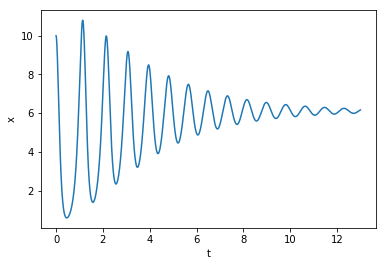

In [3]:
#3.1
rho = 15.
X,Y,Z,T = Lorenz(10.,10.,22.,0.,13.)
plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

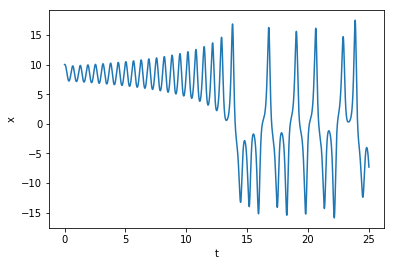

In [4]:
#3.2
rho = 28.
X,Y,Z,T = Lorenz(10.,10.,27.,0.,25.)
plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

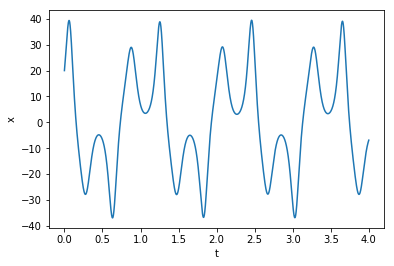

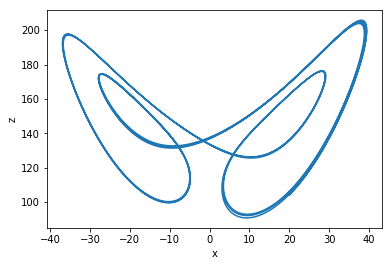

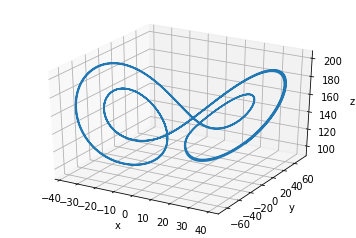

In [5]:
#3.3
rho = 148.5
X,Y,Z,T = Lorenz(20.,54.,104.,0.,4.)
plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

#3.4
plt.plot(X,Z)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

ax = plt.axes(projection='3d')
ax.plot3D(X,Y,Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

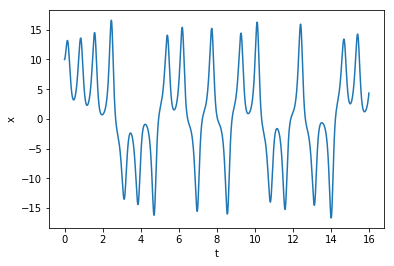

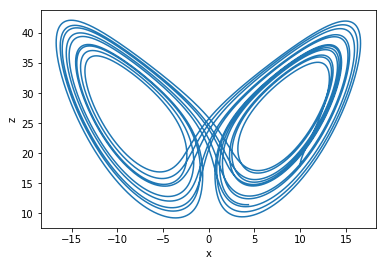

In [11]:
#3.5
rho = 28.
X,Y,Z,T = Lorenz(10.,10.,18.,0.,16.)
plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

#3.6
plt.plot(X,Z)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

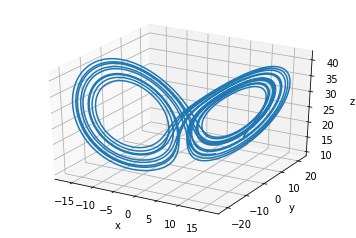

In [7]:
ax = plt.axes(projection='3d')
ax.plot3D(X,Y,Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()